# Absorbing Markov Chain Transition Matrix Function

In [66]:
# 5/16/12020
# function produces a transition matrix for absorbing markov chains
# with one or more than one absorbing states

import random
import numpy as np

# define a function that makes an absorbing transition matrix
def absorbing_matrix(lvec, abstates): 
    lvec = lvec # vector length
    m = list()

    for k in range(0,lvec): # len.vector - 1 in order to have a spare state for the absorbing state
        v = [0]
        v = np.append(v, random.random())
        for i in range(0,lvec-2):
            if i == lvec - 1:
                v = np.append(v, 1-sum(v))
            else: v = np.append(v, random.uniform(0,1-sum(v)))
        random.shuffle(v) # shuffle v
        m = np.append(m, v)

    shape = (lvec, lvec )
    m = m.reshape( shape )

    abstates = abstates
    abstates = random.sample(range(0,lvec), k= abstates) 

    for i in range(0, len(abstates)):
        x = int(abstates[i])
        m[x][range(0,len(m))] = 0
        m[abstates[i]][abstates[i]] = 1     
    
    #m = np.transpose(m)
    return m
	


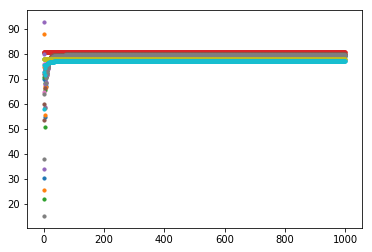

In [67]:

# DEFINE THE DIMENSIONS OF THE MATRIX
lvec = 10  # Write value here

abstates = 2 # Provide the number of absorbing states

# Markov chain transition matrix
m = absorbing_matrix(lvec, abstates)

# Run the experiment over so many trials
# Define the number of trials

ntrials = 1000 # Write value here

# state matrix s
s = random.sample(range(1,99), k = lvec )

ll = list(s)

for i in range(1,ntrials):
    s = np.dot(m,s) # matrix multiplicatoin is %*%
    ll = np.append(ll,s)

shape = (ntrials, lvec)
ll = ll.reshape(shape)

from pandas import DataFrame
ll = DataFrame(np.array(ll))

import matplotlib.pyplot as plt

for i in range(0,lvec):
    plt.scatter(range(0,ntrials), ll[i], s = 10)

plt.show()
